#  Resumen de pasos realizados

1. **Carga de datos**

2. **Exploración y análisis inicial**

   2.1. Análisis de columnas, tipos de datos, valores nulos (explícitos y ocultos)

   2.2. Visualizaciones básicas de variables y objetivo

   2.3. Asociación de variables numéricas y categóricas con la variable objetivo

   2.4. Visualizaciones avanzadas y pruebas estadísticas

3. **Análisis de desbalance de la variable objetivo**

   3.1. Visualización y cuantificación del desbalance

4. **Preprocesamiento de datos**

   4.1. Mapeo y codificación de variables categóricas

   4.2. Estandarización de variables numéricas

   4.3. Análisis y tratamiento de valores atípicos y negativos

   4.4. Transformaciones (log, one-hot, ordinal)

5. **Balanceo de clases**

   5.1. Submuestreo de la clase mayoritaria

   5.2. Aplicación de SMOTE para balancear la clase minoritaria

6. **Preparación de conjuntos de entrenamiento y prueba**

   6.1. División train/test

7. **Construcción y ajuste de modelos**

   7.1. Entrenamiento de modelos base (Gradient Boosting, LDA)

   7.2. Ajuste de hiperparámetros (GridSearchCV, RandomizedSearchCV)

8. **Validación cruzada y evaluación de modelos**

   8.1. Evaluación con métricas: accuracy, precision, recall, f1

   8.2. Comparación antes y después del ajuste

9. **Ajuste de umbral de decisión y análisis de métricas**

   9.1. Ajuste de umbral para optimizar métricas

10. **Análisis de overfitting/underfitting**

    10.1. Comparación de desempeño entre train y test

In [2]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from imblearn.combine import SMOTETomek

# 1. Carga de datos

In [5]:
# Cargar el DataFrame principal desde un archivo CSV
import pandas as pd
# Cargar el dataset
df = pd.read_csv(r'c:/Users/admin/Desktop/MACHINE LEARNING/PLATZI_PROYECTOS/Proyecto_6/CVD_cleaned.csv')

# 2. Exploración y análisis inicial

In [6]:
print(df.columns.tolist())

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [7]:
print(df.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [8]:
print(df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [9]:
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 308854
Número de columnas: 19


In [10]:
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Columnas: {df.columns.tolist()}")

Número de filas: 308854
Número de columnas: 19
Columnas: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [11]:
# Contar columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Columnas numéricas ({len(num_cols)}): {list(num_cols)}")

# Contar columnas categóricas (object y category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Columnas categóricas ({len(cat_cols)}): {list(cat_cols)}")

Columnas numéricas (7): ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
Columnas categóricas (12): ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


In [12]:
# 1. Nulos explícitos (NaN)
print("Valores nulos explícitos por columna:")
print(df.isnull().sum())
print(f"Total de valores nulos explícitos en el DataFrame: {df.isnull().sum().sum()}")

# 2. Nulos escondidos: valores vacíos, 'NA', 'N/A', 'na', 'null', 'None', etc.
hidden_nulls = ['',' ','NA','N/A','na','null','None','NONE']
print("\nValores nulos 'escondidos' por columna:")
for col in df.columns:
    if df[col].dtype == object or str(df[col].dtype) == 'category':
        count = df[col].isin(hidden_nulls).sum()
        if count > 0:
            print(f"{col}: {count}")

# 3. Resumen general
print("\nResumen general:")
print(f"Filas con al menos un nulo explícito: {df.isnull().any(axis=1).sum()}")
print(f"Filas con al menos un nulo escondido: {(df.apply(lambda x: x.isin(hidden_nulls) if (x.dtype == object or str(x.dtype) == 'category') else False).any(axis=1)).sum()}")

Valores nulos explícitos por columna:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64
Total de valores nulos explícitos en el DataFrame: 0

Valores nulos 'escondidos' por columna:

Resumen general:
Filas con al menos un nulo explícito: 0
Filas con al menos un nulo escondido: 0


## 2.1. Visualización rápida de variables y objetivo

## 2.2. Análisis detallado de variables: asociación y visualizaciones avanzadas

En esta sección se analiza la asociación de variables numéricas y categóricas con la variable objetivo, usando visualizaciones avanzadas y pruebas estadísticas.

## 2.2.1. Resumen y visualización de variables numéricas

Las variables numéricas consideradas en este análisis son:

- **Height_(cm)**: Altura en centímetros
- **Weight_(kg)**: Peso en kilogramos
- **BMI**: Índice de masa corporal
- **Alcohol_Consumption**: Consumo de alcohol
- **Fruit_Consumption**: Consumo de frutas
- **Green_Vegetables_Consumption**: Consumo de vegetales verdes
- **FriedPotato_Consumption**: Consumo de papas fritas

A continuación se muestran estadísticas descriptivas y visualizaciones básicas para estas variables.

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


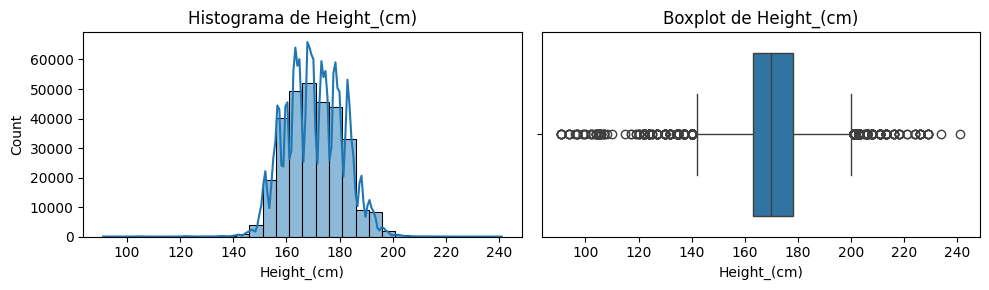

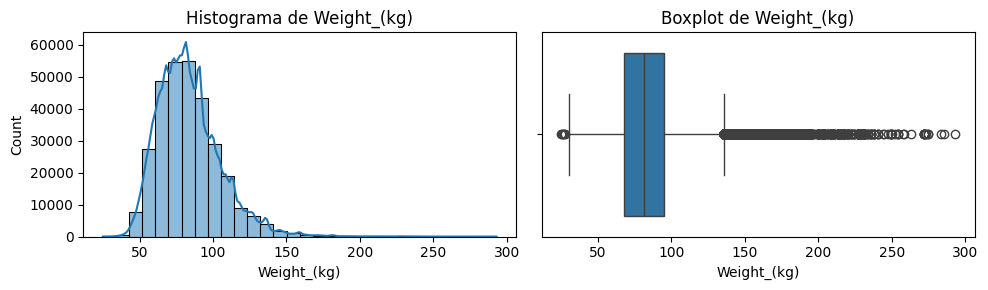

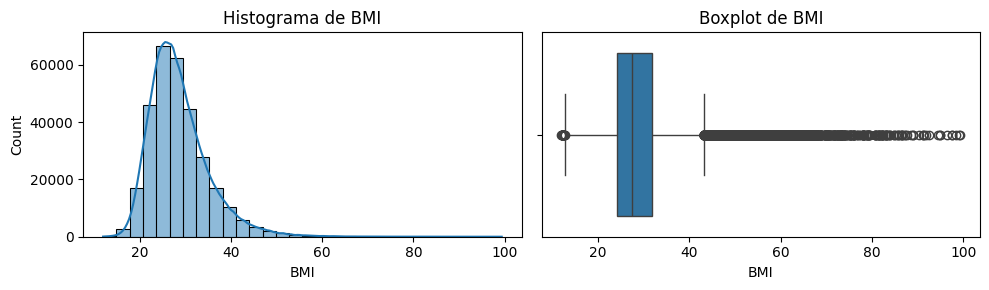

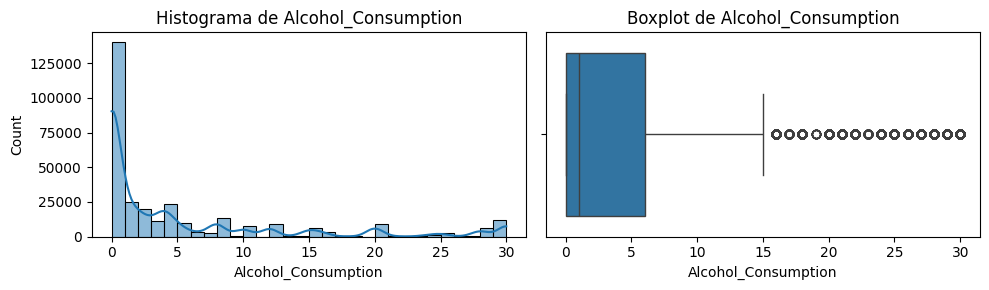

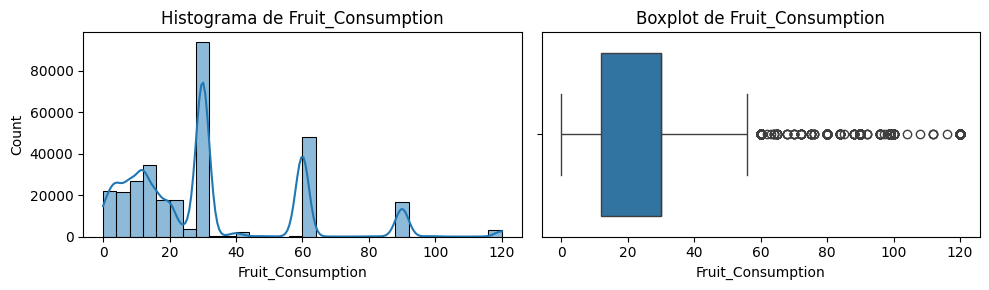

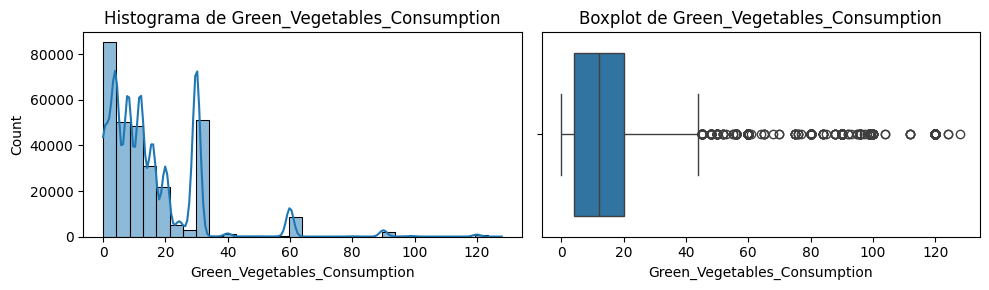

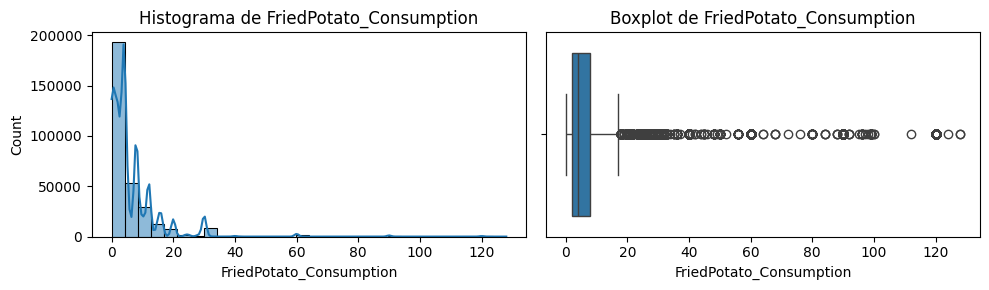

In [17]:
# Estadísticas descriptivas de las variables numéricas
num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
display(df[num_cols].describe())

# Histogramas y boxplots para cada variable numérica
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Histograma de {col}')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

In [36]:
# 1. Separar variables numéricas y categóricas (ya realizado, pero mostramos resumen y head)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Variables numéricas: {num_cols}')
print(f'Variables categóricas: {cat_cols}')
display(df[num_cols].head())
display(df[cat_cols].head())

Variables numéricas: ['Heart_Disease', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
Variables categóricas: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


,Heart_Disease,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,0,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,1,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,0,191.0,88.45,24.37,0.0,8.0,4.0,0.0


,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,Yes


### Influencia de variables categóricas sobre la variable objetivo

Se analiza la relación entre cada variable categórica y la variable objetivo usando tablas de contingencia, test chi-cuadrado y gráficos de barras. Esto permite identificar qué variables categóricas tienen mayor asociación con la presencia de enfermedad cardíaca.

,Variable,Chi2,p-value
0,General_Health,19234.334137,0.000000e+00
1,Checkup,2731.043538,0.000000e+00
2,Exercise,2867.000889,0.000000e+00
3,Skin_Cancer,2549.110840,0.000000e+00
4,Other_Cancer,2636.183969,0.000000e+00
6,Diabetes,10418.549631,0.000000e+00
7,Arthritis,7316.548749,0.000000e+00
8,Sex,1627.652111,0.000000e+00
10,Smoking_History,3588.940956,0.000000e+00
9,Age_Category,18035.930859,0.000000e+00


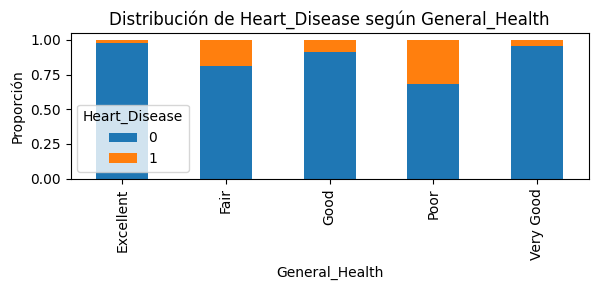

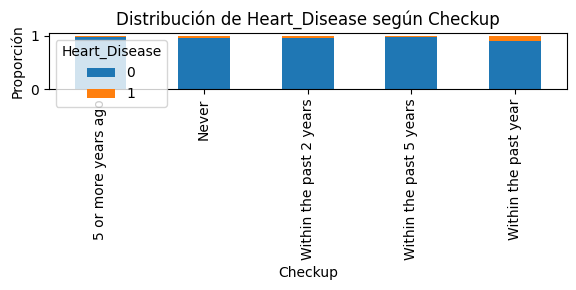

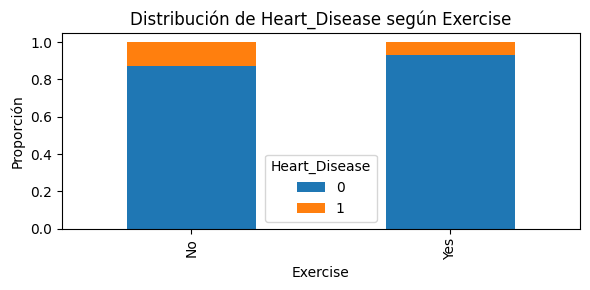

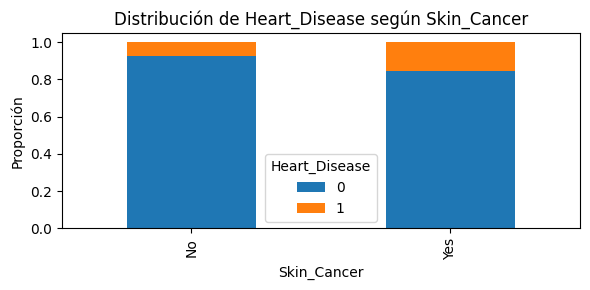

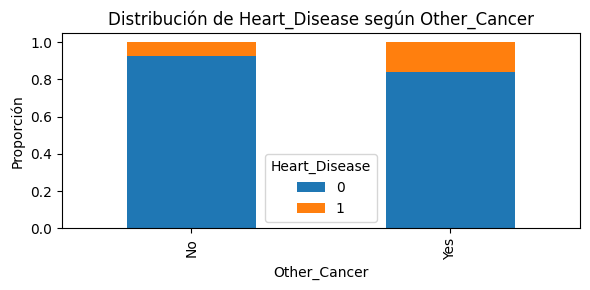

In [37]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

chi2_results = []
for col in cat_cols:
    if col == 'Heart_Disease':
        continue
    ct = pd.crosstab(df[col], df['Heart_Disease'])
    chi2, p, dof, ex = chi2_contingency(ct, correction=False)
    chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
display(chi2_df)

# Gráfico: top 5 variables categóricas más asociadas (menor p-valor)
top_cat = chi2_df.nsmallest(5, 'p-value')['Variable']
for col in top_cat:
    plt.figure(figsize=(6,3))
    prop = pd.crosstab(df[col], df['Heart_Disease'], normalize='index')
    prop.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de Heart_Disease según {col}')
    plt.ylabel('Proporción')
    plt.xlabel(col)
    plt.legend(title='Heart_Disease')
    plt.tight_layout()
    plt.show()

**Explicación:**

- La tabla muestra el estadístico chi2 y el p-valor para cada variable categórica respecto a la variable objetivo.
- Un p-valor bajo (<0.05) indica fuerte asociación entre la variable categórica y la presencia de enfermedad cardíaca.
- Los gráficos muestran cómo se distribuye la variable objetivo dentro de cada categoría, permitiendo identificar patrones claros de riesgo.
Claro. Esa tabla muestra los resultados del **test chi-cuadrado** entre cada variable categórica y la variable objetivo (`Heart_Disease`). Los campos significan:

- **Variable**: Nombre de la variable categórica analizada.
- **Chi2**: Estadístico chi-cuadrado calculado. Un valor alto indica mayor diferencia entre las categorías respecto a la variable objetivo.
- **p-value**: Probabilidad de obtener ese resultado si no hubiera asociación real. Un valor muy bajo (por ejemplo, <0.05) indica que la asociación es estadísticamente significativa.

**Interpretación:**
- Todas las variables listadas tienen un p-value extremadamente bajo (prácticamente 0), lo que significa que **hay una asociación estadísticamente significativa entre cada variable y la presencia de enfermedad cardíaca**.
- Las variables con mayor estadístico Chi2 (por ejemplo, `General_Health`, `Age_Category`, `Diabetes`) son las que muestran mayor diferencia en la distribución de la variable objetivo entre sus categorías, es decir, **son las más asociadas a la presencia o ausencia de enfermedad cardíaca**.

En resumen:  
**Todas esas variables categóricas están fuertemente asociadas con la variable objetivo, y las primeras de la lista son las más relevantes según el test chi-cuadrado.**

### Influencia de variables numéricas sobre la variable objetivo

c:\Users\admin\Desktop\MACHINE LEARNING\PLATZI_PROYECTOS\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Variable,F,p-value
0,Heart_Disease,inf,0.000000e+00
2,Weight_(kg),651.361546,1.593669e-143
3,BMI,563.265585,2.118557e-124
4,Alcohol_Consumption,413.573238,7.025824e-92
6,Green_Vegetables_Consumption,178.646859,9.822277e-41
5,Fruit_Consumption,124.266950,7.458026e-29
1,Height_(cm),76.930056,1.779934e-18
7,FriedPotato_Consumption,26.296889,2.929361e-07


,Variable,Corr_pb,p-value
0,Heart_Disease,1.000000,0.000000e+00
2,Weight_(kg),0.045875,1.593669e-143
3,BMI,0.042666,2.118557e-124
4,Alcohol_Consumption,-0.036569,7.025824e-92
6,Green_Vegetables_Consumption,-0.024043,9.822277e-41
5,Fruit_Consumption,-0.020055,7.458026e-29
1,Height_(cm),0.015780,1.779934e-18
7,FriedPotato_Consumption,-0.009227,2.929361e-07


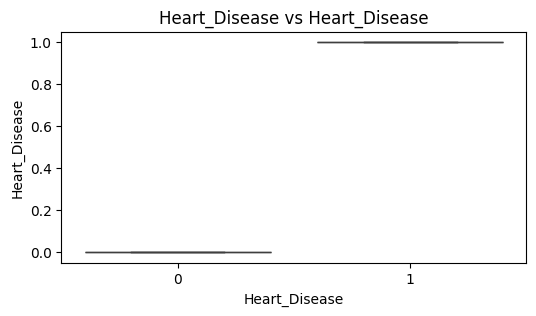

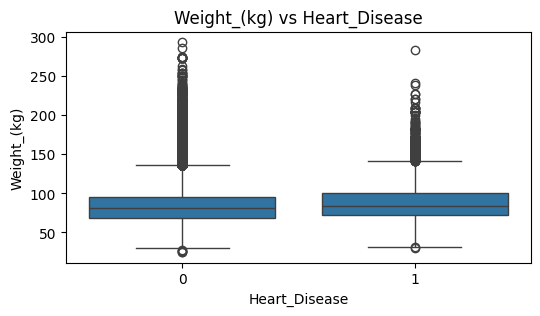

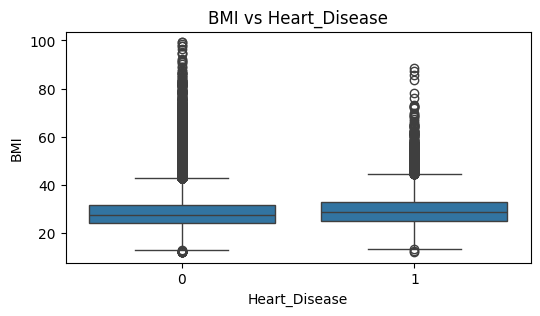

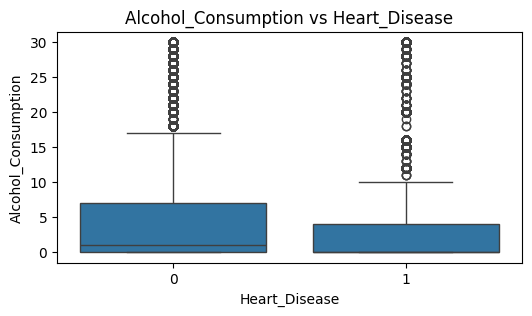

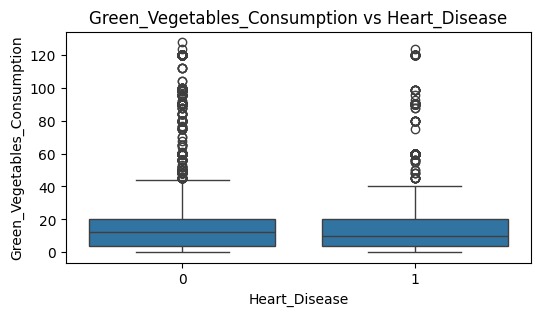

In [38]:
from scipy.stats import f_oneway, pointbiserialr

anova_results = []
corr_results = []
for col in num_cols:
    grupo0 = df[df['Heart_Disease']==0][col].dropna()
    grupo1 = df[df['Heart_Disease']==1][col].dropna()
    if len(grupo0)>1 and len(grupo1)>1:
        fval, pval = f_oneway(grupo0, grupo1)
        anova_results.append({'Variable': col, 'F': fval, 'p-value': pval})
        # Correlación punto-biserial (numérica vs binaria)
        try:
            corr, p_corr = pointbiserialr(df['Heart_Disease'].dropna(), df[col].dropna())
        except:
            corr, p_corr = np.nan, np.nan
        corr_results.append({'Variable': col, 'Corr_pb': corr, 'p-value': p_corr})

# Solo mostrar si hay resultados
if anova_results:
    anova_df = pd.DataFrame(anova_results).sort_values('p-value')
    display(anova_df)
else:
    print('No hay resultados ANOVA para mostrar.')

if corr_results:
    corr_df = pd.DataFrame(corr_results).sort_values('Corr_pb', key=lambda x: abs(x), ascending=False)
    display(corr_df)
else:
    print('No hay resultados de correlación punto-biserial para mostrar.')

# Gráfico: top 5 variables numéricas más asociadas (menor p-valor ANOVA)
if anova_results:
    top_num = pd.DataFrame(anova_results).nsmallest(5, 'p-value')['Variable']
    for col in top_num:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='Heart_Disease', y=col, data=df)
        plt.title(f'{col} vs Heart_Disease')
        plt.show()
else:
    print('No hay variables numéricas para graficar.')

**Explicación:**

- La tabla ANOVA muestra qué variables numéricas tienen diferencias significativas entre los grupos con y sin enfermedad cardíaca (p-valor bajo).
- La tabla de correlación punto-biserial indica la fuerza y dirección de la relación entre cada variable numérica y la variable objetivo (valores cercanos a 1 o -1 indican mayor asociación).
- Los boxplots permiten visualizar si existen diferencias claras en la distribución de las variables numéricas según la presencia de enfermedad cardíaca.

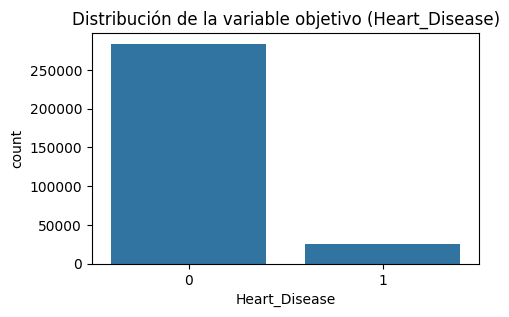

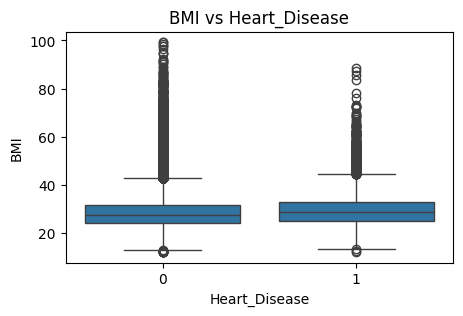

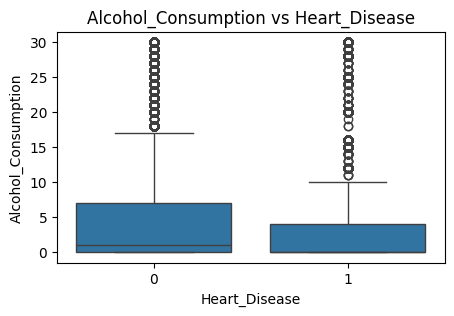

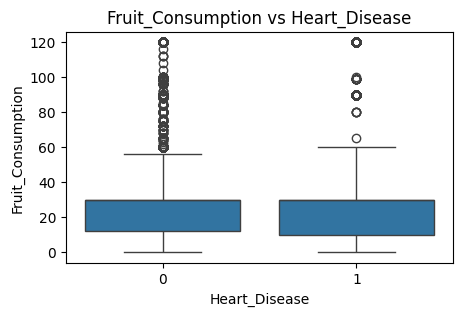

In [39]:
# Visualización de la variable objetivo
plt.figure(figsize=(5,3))
sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribución de la variable objetivo (Heart_Disease)')
plt.show()

# Boxplot de variables numéricas vs objetivo
for col in ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Heart_Disease', y=col, data=df)
    plt.title(f'{col} vs Heart_Disease')
    plt.show()

# 3. Análisis de desbalance de la variable objetivo

Distribución original de la variable objetivo:
Heart_Disease
0    0.91915
1    0.08085
Name: proportion, dtype: float64


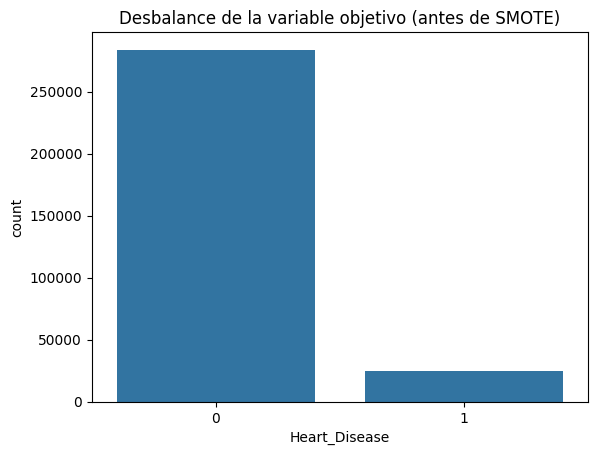

In [40]:
# Análisis de desbalance antes de cualquier preprocesamiento
print('Distribución original de la variable objetivo:')
print(df['Heart_Disease'].value_counts(normalize=True))
sns.countplot(x='Heart_Disease', data=df)
plt.title('Desbalance de la variable objetivo (antes de SMOTE)')
plt.show()

In [41]:
# Verifica y corrige el mapeo de Heart_Disease antes del submuestreo
print('Valores únicos en Heart_Disease antes del mapeo:', df['Heart_Disease'].unique())
print('Cantidad de filas en df:', len(df))
print('Primeras filas:\n', df[['Heart_Disease']].head())

# Realiza el mapeo solo si es necesario
if not set(df['Heart_Disease'].dropna().unique()).issubset({0, 1}):
    df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})

# Mostrar filas con nulos en Heart_Disease después del mapeo (no eliminar)
nulos_hd = df[df['Heart_Disease'].isnull()]
print('Filas con nulos en Heart_Disease después del mapeo:')
print(nulos_hd)

print('Valores únicos en Heart_Disease después del mapeo:', df['Heart_Disease'].unique())
print('Cantidad de filas en df después del mapeo (sin eliminar nulos):', len(df))
print('Primeras filas:\n', df[['Heart_Disease']].head())

Valores únicos en Heart_Disease antes del mapeo: [0 1]
Cantidad de filas en df: 308854
Primeras filas:
    Heart_Disease
0              0
1              1
2              0
3              1
4              0
Filas con nulos en Heart_Disease después del mapeo:
Empty DataFrame
Columns: [General_Health, Checkup, Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex, Age_Category, Height_(cm), Weight_(kg), BMI, Smoking_History, Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption]
Index: []
Valores únicos en Heart_Disease después del mapeo: [0 1]
Cantidad de filas en df después del mapeo (sin eliminar nulos): 308854
Primeras filas:
    Heart_Disease
0              0
1              1
2              0
3              1
4              0


In [42]:
# Ejemplo de submuestreo de la clase mayoritaria
df_majority = df[df['Heart_Disease'] == 0]
df_minority = df[df['Heart_Disease'] == 1]
print(f'Muestras clase 0: {len(df_majority)}, clase 1: {len(df_minority)}')
if len(df_minority) > 0 and len(df_majority) > 0:
    n_samples = max(1, len(df_minority)*2)  # asegura al menos 1 muestra
    df_majority_downsampled = resample(df_majority, 
                                       replace=False, 
                                       n_samples=n_samples, # ratio 2:1
                                       random_state=42)
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    print(df_balanced['Heart_Disease'].value_counts())
else:
    print('No hay suficientes muestras para submuestreo. Revisa el mapeo de Heart_Disease y la presencia de ambas clases.')

Muestras clase 0: 283883, clase 1: 24971
Heart_Disease
0    49942
1    24971
Name: count, dtype: int64


In [43]:
# --- PRECAUCIÓN: Preprocesamiento para df_balanced si df_X/df_y no existen ---
try:
    df_X
    df_y
except NameError:
    # Selección de columnas numéricas y categóricas
    num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    cat_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
    
    df_num = df_balanced[num_cols]
    df_obj = df_balanced[cat_cols].copy()
    
    # Codificación categórica igual que en el preprocesamiento principal
    df_obj['General_Health'] = df_obj['General_Health'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very Good': 3, 'Excellent':4})
    df_obj['Checkup'] = df_obj['Checkup'].map({'Never':0, '5 or more years ago':1, 'Within the past 5 years':2, 'Within the past 2 years': 3, 'Within the past year':4})
    for col in ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']:
        if col == 'Sex':
            df_obj[col] = df_obj[col].map({'Male':0,'Female':1})
        else:
            df_obj[col] = df_obj[col].map({'No':0,'Yes':1})
    df_obj['Diabetes'] = df_obj['Diabetes'].map({'No':0,'No, pre-diabetes or borderline diabetes':1, 'Yes':2, 'Yes, but female told only during pregnancy':3})
    df_age_cat = pd.get_dummies(df_obj['Age_Category'], prefix='Age_Category')
    df_obj = df_obj.drop(['Age_Category'], axis=1)
    
    # Estandarización numérica
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols, index=df_num.index)
    
    # Concatenación
    df_X = pd.concat([scaled_df_num, df_obj, df_age_cat], axis=1)
    df_y = df_balanced['Heart_Disease']

Distribución original de la variable objetivo:
Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


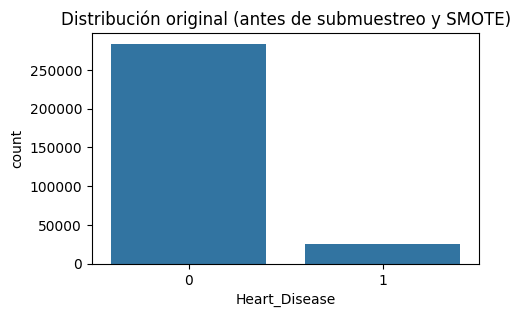


Distribución después del submuestreo:
Heart_Disease
0    49942
1    24971
Name: count, dtype: int64


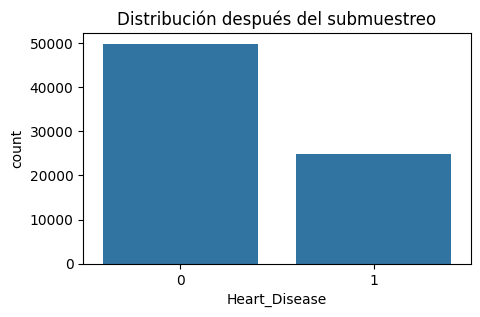


Distribución después de SMOTE:
Heart_Disease
0    283883
1    283883
Name: count, dtype: int64


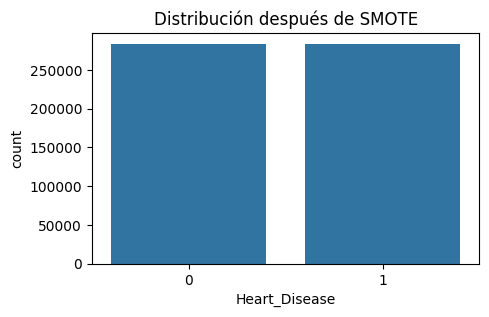


Explicación:
- **Original:** La variable objetivo estaba desbalanceada, con muchas más muestras de la clase 0 (sin enfermedad) que de la clase 1 (con enfermedad).
- **Submuestreo:** Se redujo la cantidad de muestras de la clase mayoritaria para acercar el balance (aquí, ratio 2:1).
- **SMOTE:** Se generaron muestras sintéticas de la clase minoritaria hasta igualar la clase mayoritaria, logrando un dataset balanceado.
- Las gráficas muestran cómo cambia la distribución de la variable objetivo en cada paso.



In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 1. Distribución original
print("Distribución original de la variable objetivo:")
print(df['Heart_Disease'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribución original (antes de submuestreo y SMOTE)')
plt.show()

# 2. Distribución después del submuestreo (usa df_balanced creado antes)
print("\nDistribución después del submuestreo:")
print(df_balanced['Heart_Disease'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='Heart_Disease', data=df_balanced)
plt.title('Distribución después del submuestreo')
plt.show()

# 3. Prepara X e y para SMOTE
X_smote = df_X.copy()
y_smote = df_y.copy()

# 4. Aplica SMOTE
if X_smote.shape[0] > 0 and y_smote.shape[0] > 0:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_smote, y_smote)
    print("\nDistribución después de SMOTE:")
    print(pd.Series(y_res).value_counts())
    plt.figure(figsize=(5,3))
    sns.countplot(x=y_res)
    plt.title('Distribución después de SMOTE')
    plt.show()
else:
    print('df_X y/o df_y están vacíos. Revisa el preprocesamiento y la eliminación de nulos.')

print("""
Explicación:
- **Original:** La variable objetivo estaba desbalanceada, con muchas más muestras de la clase 0 (sin enfermedad) que de la clase 1 (con enfermedad).
- **Submuestreo:** Se redujo la cantidad de muestras de la clase mayoritaria para acercar el balance (aquí, ratio 2:1).
- **SMOTE:** Se generaron muestras sintéticas de la clase minoritaria hasta igualar la clase mayoritaria, logrando un dataset balanceado.
- Las gráficas muestran cómo cambia la distribución de la variable objetivo en cada paso.
""")

# 4. Preprocesamiento de datos

En esta sección se realiza el preprocesamiento de variables numéricas y categóricas, y se preparan los datos para el entrenamiento de modelos de clasificación.

In [45]:
# Selección de columnas numéricas y categóricas
num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
cat_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

df_num = df[num_cols]
df_obj = df[cat_cols].copy()

## 4.1. Estandarización de variables numéricas

In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols)
scaled_df_num.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,-1.934250,-2.386180,-2.159696,-0.621527,0.006625,0.059597,0.664502
1,-0.526857,-0.303547,-0.051548,-0.621527,0.006625,-1.012342,-0.267579
2,-0.714510,0.227770,0.742649,-0.133707,-0.716973,-0.811354,1.130543
3,0.880535,0.461569,0.015913,-0.621527,0.006625,0.997544,0.198462
4,1.912623,0.227770,-0.652562,-0.621527,-0.877772,-0.744358,-0.733620


## 4.2. Codificación de variables categóricas

In [47]:
# General_Health ordinal
df_obj['General_Health'] = df_obj['General_Health'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very Good': 3, 'Excellent':4})
# Checkup ordinal
df_obj['Checkup'] = df_obj['Checkup'].map({'Never':0, '5 or more years ago':1, 'Within the past 5 years':2, 'Within the past 2 years': 3, 'Within the past year':4})
# Binarias
for col in ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']:
    if col == 'Sex':
        df_obj[col] = df_obj[col].map({'Male':0,'Female':1})
    else:
        df_obj[col] = df_obj[col].map({'No':0,'Yes':1})
# Diabetes ordinal
df_obj['Diabetes'] = df_obj['Diabetes'].map({'No':0,'No, pre-diabetes or borderline diabetes':1, 'Yes':2, 'Yes, but female told only during pregnancy':3})
# Age_Category one-hot
df_age_cat = pd.get_dummies(df_obj['Age_Category'], prefix='Age_Category')
df_obj = df_obj.drop(['Age_Category'], axis=1)

## 4.3. Concatenación de variables procesadas

In [48]:
df_X = pd.concat([scaled_df_num, df_obj, df_age_cat], axis=1)
df_X.head()

# Variable objetivo (asegúrate de crearla antes de eliminar nulos)
df_y = df['Heart_Disease']

# Verifica si hay nulos después del preprocesamiento
print("Nulos en df_X por columna:")
print(df_X.isnull().sum())
print("Nulos en df_y:", df_y.isnull().sum())
print("df_X shape:", df_X.shape)
print("df_y shape:", df_y.shape)
print("¿Hay nulos en df_X?", df_X.isnull().sum().sum())
print("¿Hay nulos en df_y?", df_y.isnull().sum())

# # Elimina filas con nulos en X o y (por si el mapeo generó NaN)
# mask = ~(df_X.isnull().any(axis=1) | df_y.isnull())
# df_X = df_X[mask]
# df_y = df_y[mask]
# print("Filas después de eliminar nulos tras el preprocesamiento:", df_X.shape[0])

Nulos en df_X por columna:
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Smoking_History                 0
Age_Category_18-24              0
Age_Category_25-29              0
Age_Category_30-34              0
Age_Category_35-39              0
Age_Category_40-44              0
Age_Category_45-49              0
Age_Category_50-54              0
Age_Category_55-59              0
Age_Category_60-64              0
Age_Category_65-69              0
Age_Category_70-74              0
Age_Category_75-79   

## 4.4. Variable objetivo

In [32]:
# Ya se creó df_y y se eliminaron nulos en la celda anterior, así que solo imprime el conteo
print(df_y.value_counts())

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


# 5. Balanceo de clases

,Variable,F,p-value
1,Weight_(kg),651.361546,1.593669e-143
2,BMI,563.265585,2.118557e-124
3,Alcohol_Consumption,413.573238,7.025824e-92
5,Green_Vegetables_Consumption,178.646859,9.822277e-41
4,Fruit_Consumption,124.266950,7.458026e-29
0,Height_(cm),76.930056,1.779934e-18
6,FriedPotato_Consumption,26.296889,2.929361e-07


,Variable,Corr_pb,p-value
1,Weight_(kg),0.045875,1.593669e-143
2,BMI,0.042666,2.118557e-124
3,Alcohol_Consumption,-0.036569,7.025824e-92
5,Green_Vegetables_Consumption,-0.024043,9.822277e-41
4,Fruit_Consumption,-0.020055,7.458026e-29
0,Height_(cm),0.015780,1.779934e-18
6,FriedPotato_Consumption,-0.009227,2.929361e-07


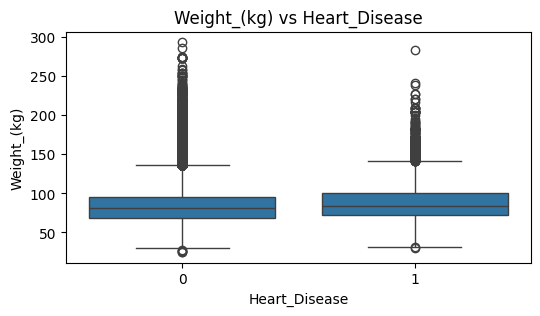

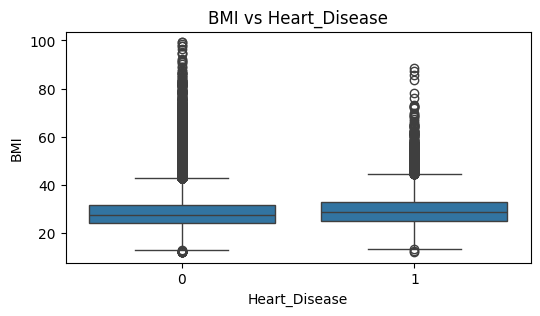

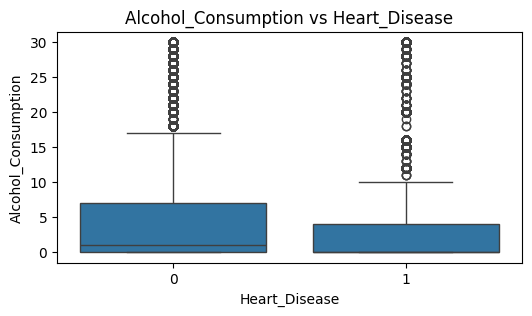

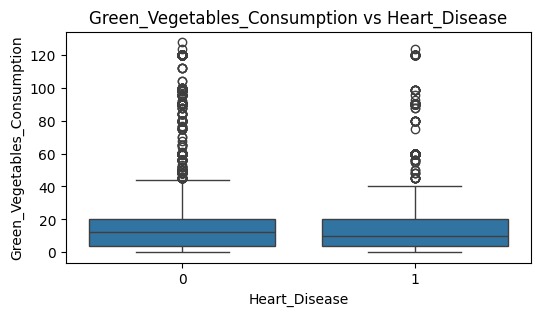

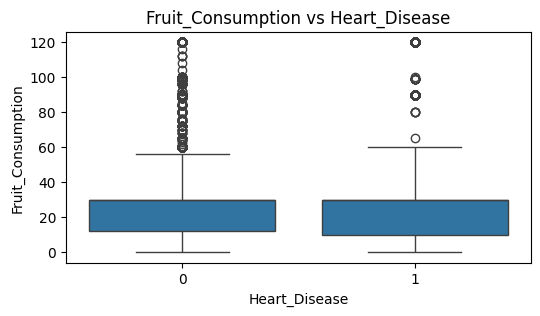

In [49]:
from scipy.stats import f_oneway, pointbiserialr

anova_results = []
corr_results = []
for col in num_cols:
    grupo0 = df[df['Heart_Disease']==0][col].dropna()
    grupo1 = df[df['Heart_Disease']==1][col].dropna()
    if len(grupo0)>1 and len(grupo1)>1:
        fval, pval = f_oneway(grupo0, grupo1)
        anova_results.append({'Variable': col, 'F': fval, 'p-value': pval})
        # Correlación punto-biserial (numérica vs binaria)
        try:
            corr, p_corr = pointbiserialr(df['Heart_Disease'].dropna(), df[col].dropna())
        except:
            corr, p_corr = np.nan, np.nan
        corr_results.append({'Variable': col, 'Corr_pb': corr, 'p-value': p_corr})

# Solo mostrar si hay resultados
if anova_results:
    anova_df = pd.DataFrame(anova_results).sort_values('p-value')
    display(anova_df)
else:
    print('No hay resultados ANOVA para mostrar.')

if corr_results:
    corr_df = pd.DataFrame(corr_results).sort_values('Corr_pb', key=lambda x: abs(x), ascending=False)
    display(corr_df)
else:
    print('No hay resultados de correlación punto-biserial para mostrar.')

# Gráfico: top 5 variables numéricas más asociadas (menor p-valor ANOVA)
if anova_results:
    top_num = pd.DataFrame(anova_results).nsmallest(5, 'p-value')['Variable']
    for col in top_num:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='Heart_Disease', y=col, data=df)
        plt.title(f'{col} vs Heart_Disease')
        plt.show()
else:
    print('No hay variables numéricas para graficar.')

# 6. Preparación de conjuntos de entrenamiento y prueba

# 6.1 Importancia de variables para GradientBoosting y LDA (numéricas y categóricas codificadas)

,Variable,GradientBoosting,LDA
7,General_Health,0.387976,0.051589
29,Age_Category_80+,0.113181,0.138207
13,Diabetes,0.100869,0.039245
15,Sex,0.090883,0.070095
28,Age_Category_75-79,0.065868,0.094032
14,Arthritis,0.060781,0.026401
27,Age_Category_70-74,0.046360,0.057575
16,Smoking_History,0.033406,0.033540
26,Age_Category_65-69,0.019090,0.024434
8,Checkup,0.015263,0.009890


<Figure size 1000x600 with 0 Axes>

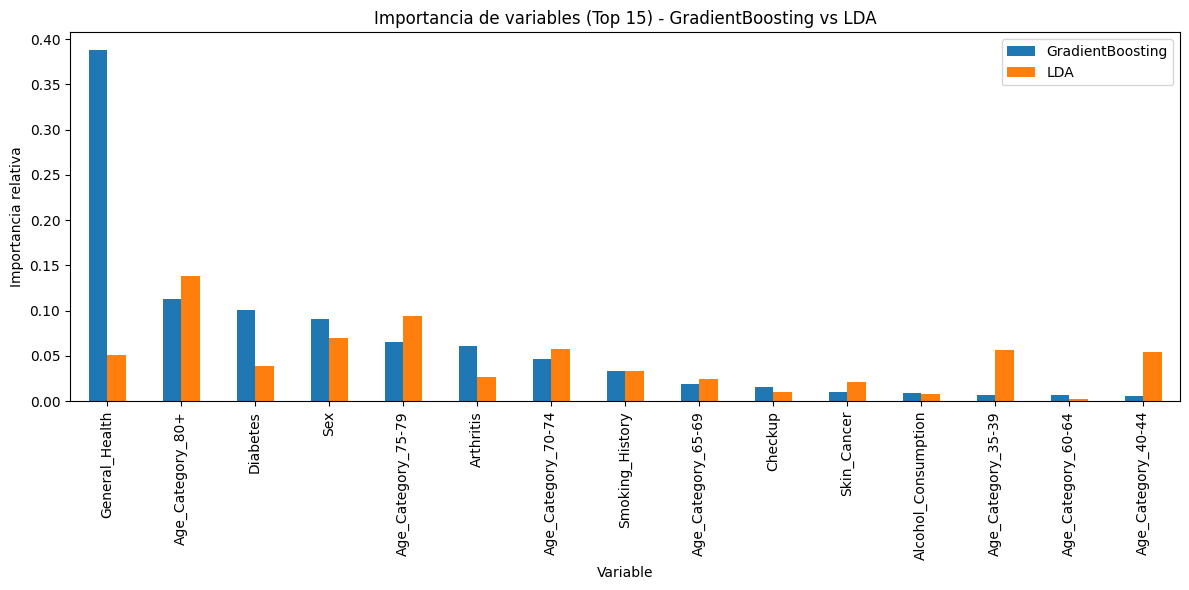

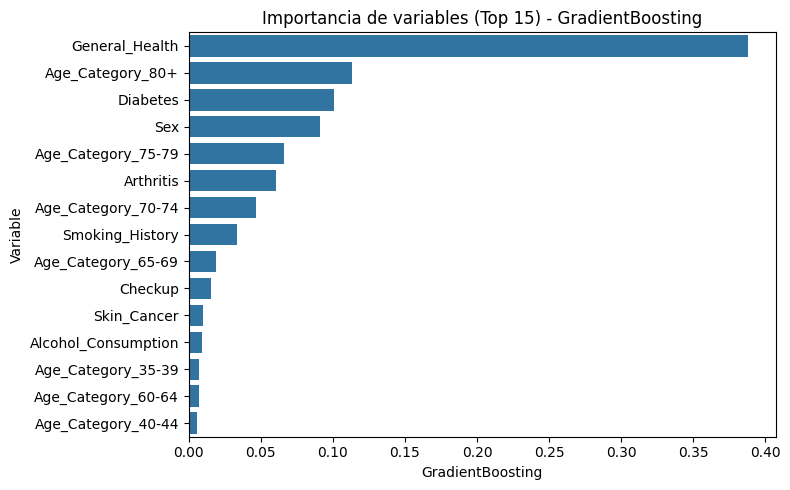

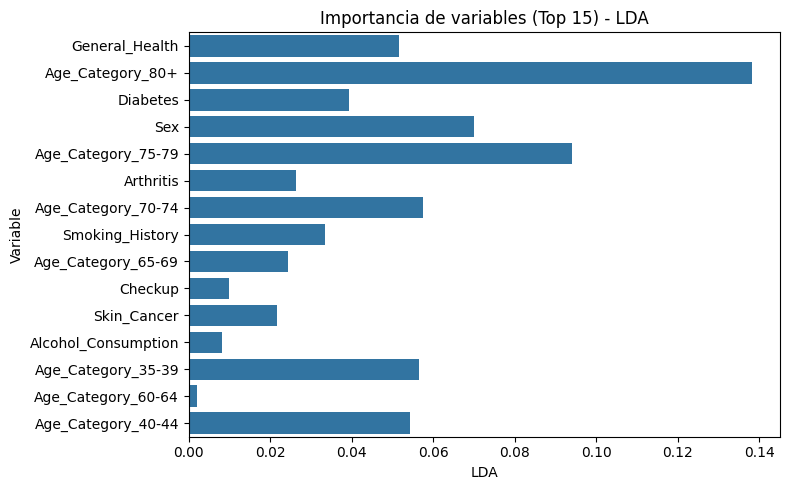

In [50]:

# <!-- Sí, puedes analizar la importancia de todas las variables (numéricas y categóricas) para ambos modelos (GradientBoosting y LDA), pero hay diferencias:

# GradientBoostingClassifier: Permite obtener importancia de todas las variables (numéricas y categóricas codificadas).
# LDA: No tiene .feature_importances_, pero puedes usar los coeficientes absolutos para estimar la importancia.
# Aquí tienes el código para mostrar la importancia de todas las variables (numéricas y categóricas codificadas) para ambos modelos, con gráficos y explicación: -->

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usa los datos ya preprocesados (df_X, df_y)
X = df_X.dropna()
y = df_y.loc[X.index]

# GradientBoosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X, y)
gbc_importances = gbc.feature_importances_

# LDA (coeficientes absolutos normalizados)
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_importances = np.abs(lda.coef_[0])
lda_importances = lda_importances / lda_importances.sum()  # Normaliza para comparar

# DataFrame de importancias
feat_imp = pd.DataFrame({
    'Variable': X.columns,
    'GradientBoosting': gbc_importances,
    'LDA': lda_importances
}).sort_values('GradientBoosting', ascending=False)

# Mostrar tabla ordenada por importancia de GradientBoosting
display(feat_imp.head(15))

# Gráfico comparativo
plt.figure(figsize=(10,6))
feat_imp_plot = feat_imp.set_index('Variable').sort_values('GradientBoosting', ascending=False).head(15)
feat_imp_plot[['GradientBoosting', 'LDA']].plot(kind='bar', figsize=(12,6))
plt.title('Importancia de variables (Top 15) - GradientBoosting vs LDA')
plt.ylabel('Importancia relativa')
plt.tight_layout()
plt.show()

# Gráfico solo GradientBoosting
plt.figure(figsize=(8,5))
sns.barplot(x='GradientBoosting', y='Variable', data=feat_imp_plot.reset_index())
plt.title('Importancia de variables (Top 15) - GradientBoosting')
plt.tight_layout()
plt.show()

# Gráfico solo LDA
plt.figure(figsize=(8,5))
sns.barplot(x='LDA', y='Variable', data=feat_imp_plot.reset_index())
plt.title('Importancia de variables (Top 15) - LDA')
plt.tight_layout()
plt.show()

# <!-- # Explicación
# print("""
# **¿Qué muestran estos análisis?**

# - Cada barra representa la importancia relativa de una variable para predecir enfermedad cardíaca según el modelo.
# - En GradientBoosting, la importancia se basa en la reducción de impureza en los árboles.
# - En LDA, la importancia se estima con el valor absoluto de los coeficientes normalizados.
# - Las variables más altas son las más relevantes para el modelo.
# - Si una variable tiene importancia muy baja en ambos modelos, puedes considerar eliminarla.
# - Si una variable es importante en uno y no en otro, evalúa según el modelo que prefieras.

# **Recomendación:**  
# Elimina variables con importancia muy baja en ambos modelos para simplificar tu modelo sin perder capacidad predictiva.
# """)

# Este análisis te permite comparar la importancia de todas las variables (numéricas y categóricas codificadas) en ambos modelos y tomar decisiones informadas sobre cuáles conservar o eliminar. -->

Te explico en detalle los valores de importancia de variables para **GradientBoosting** y **LDA**:

# 7. Construcción y ajuste de modelos

In [ ]:
# 1. Definir función de validación cruzada con SMOTE y métricas adicionales
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

def CrossValidation(X, y, classifier):
    # Realiza validación cruzada estratificada con SMOTE en cada fold
    accuracy = []
    precision = []
    recall = []
    f1 = []
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    for train, test in cv.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        sm = SMOTE()
        X_train, y_train = sm.fit_resample(X_train, y_train)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        accuracy.append(metrics.accuracy_score(y_test, prediction))
        precision.append(metrics.precision_score(y_test, prediction, zero_division=0))
        recall.append(metrics.recall_score(y_test, prediction, zero_division=0))
        f1.append(metrics.f1_score(y_test, prediction, zero_division=0))
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# 2. Calcular importancia de variables y seleccionar las relevantes
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

X = df_X.dropna()
y = df_y.loc[X.index]

# Entrena GradientBoosting y LDA para obtener importancia de variables
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X, y)
gbc_importances = gbc.feature_importances_

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_importances = np.abs(lda.coef_[0])
lda_importances = lda_importances / lda_importances.sum()

feat_imp = pd.DataFrame({
    'Variable': X.columns,
    'GradientBoosting': gbc_importances,
    'LDA': lda_importances
})

# 3. Seleccionar variables con importancia >= 0.01 en al menos uno de los modelos
mask = (feat_imp['GradientBoosting'] >= 0.01) | (feat_imp['LDA'] >= 0.01)
vars_to_keep = feat_imp.loc[mask, 'Variable'].tolist()

# 4. Filtrar df_X para solo usar las variables seleccionadas
df_X_reduced = df_X[vars_to_keep]

# Identificar variables numéricas y categóricas seleccionadas
num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
cat_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
cat_dummies = [col for col in df_X_reduced.columns if col.startswith('Age_Category_')]
cat_cols_expanded = [col for col in df_X_reduced.columns if col in cat_cols or col in cat_dummies]
num_cols_selected = [col for col in df_X_reduced.columns if col in num_cols]

print(f"Variables seleccionadas para el modelo ({len(vars_to_keep)}): {vars_to_keep}")
print(f"Variables numéricas seleccionadas: {num_cols_selected}")
print(f"Variables categóricas seleccionadas: {cat_cols_expanded}")

# 5. Ajuste de hiperparámetros con GridSearchCV para GradientBoosting
param_grid_gbc = {
    'n_estimators': [30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 30],
    'min_samples_leaf': [1, 10, 30]
}
gbc_base = GradientBoostingClassifier(random_state=7)
grid_gbc = GridSearchCV(gbc_base, param_grid_gbc, scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_gbc.fit(df_X_reduced, df_y)
print("Mejores hiperparámetros GradientBoosting:", grid_gbc.best_params_)
print("Mejor F1 score (validación) GradientBoosting:", grid_gbc.best_score_)

# Usa el mejor estimador para entrenar y evaluar con validación cruzada
gbc = grid_gbc.best_estimator_
gbc_cv = CrossValidation(df_X_reduced, df_y, gbc)
gbc_accuracy_mean = np.mean(gbc_cv['accuracy']) * 100
gbc_precision_mean = np.mean(gbc_cv['precision']) * 100
gbc_recall_mean = np.mean(ggbc_cv['recall']) * 100
gbc_f1_mean = np.mean(gbc_cv['f1']) * 100

print('Gradient Boosting Classifier (ajustado):')
print(f'  Accuracy:  {gbc_accuracy_mean:.2f}%')
print(f'  Precision: {gbc_precision_mean:.2f}%')
print(f'  Recall:    {gbc_recall_mean:.2f}%')
print(f'  F1 Score:  {gbc_f1_mean:.2f}%')

# 6. Ajuste de hiperparámetros con GridSearchCV para LDA
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}
lda_base = LinearDiscriminantAnalysis()
grid_lda = GridSearchCV(lda_base, param_grid_lda, scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_lda.fit(df_X_reduced, df_y)
print("Mejores hiperparámetros LDA:", grid_lda.best_params_)
print("Mejor F1 score (validación) LDA:", grid_lda.best_score_)

# Usa el mejor estimador para entrenar y evaluar con validación cruzada
lda = grid_lda.best_estimator_
lda_cv = CrossValidation(df_X_reduced, df_y, lda)
lda_accuracy_mean = np.mean(lda_cv['accuracy']) * 100
lda_precision_mean = np.mean(lda_cv['precision']) * 100
lda_recall_mean = np.mean(lda_cv['recall']) * 100
lda_f1_mean = np.mean(lda_cv['f1']) * 100

print('Linear Discriminant Analysis (ajustado):')
print(f'  Accuracy:  {lda_accuracy_mean:.2f}%')
print(f'  Precision: {lda_precision_mean:.2f}%')
print(f'  Recall:    {lda_recall_mean:.2f}%')
print(f'  F1 Score:  {lda_f1_mean:.2f}%')

Variables seleccionadas para el modelo (22): ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+']
Variables numéricas seleccionadas: []
Variables categóricas seleccionadas: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History', 'Age_Category_18-24', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+']
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mejores hiperpará

# 8. Validación cruzada y evaluación de modelos

In [66]:
# Dividir datos en train/test antes de evaluar modelos mejorados
X_train, X_test, y_train, y_test = train_test_split(df_X_reduced, df_y, test_size=0.2, random_state=42, stratify=df_y)

In [ ]:
# Evaluar SOLO GradientBoosting y LDA en train/test split
modelos_mejorados = {
    'GradientBoosting': gbc,
    'LDA': lda
}

metrics_train_mejorados = {m: {} for m in ['accuracy', 'precision', 'recall', 'f1']}
metrics_test_mejorados = {m: {} for m in ['accuracy', 'precision', 'recall', 'f1']}

for nombre, modelo in modelos_mejorados.items():
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    metrics_train_mejorados['accuracy'][nombre] = accuracy_score(y_train, y_pred_train)
    metrics_test_mejorados['accuracy'][nombre] = accuracy_score(y_test, y_pred_test)
    metrics_train_mejorados['precision'][nombre] = precision_score(y_train, y_pred_train)
    metrics_test_mejorados['precision'][nombre] = precision_score(y_test, y_pred_test)
    metrics_train_mejorados['recall'][nombre] = recall_score(y_train, y_pred_train)
    metrics_test_mejorados['recall'][nombre] = recall_score(y_test, y_pred_test)
    metrics_train_mejorados['f1'][nombre] = f1_score(y_train, y_pred_train)
    metrics_test_mejorados['f1'][nombre] = f1_score(y_test, y_pred_test)

# DataFrame de comparación
df_metrics_mejorados = pd.DataFrame({
    'Modelo': list(modelos_mejorados.keys()),
    'Accuracy Train': [metrics_train_mejorados['accuracy'][n] for n in modelos_mejorados.keys()],
    'Accuracy Test': [metrics_test_mejorados['accuracy'][n] for n in modelos_mejorados.keys()],
    'Precision Test': [metrics_test_mejorados['precision'][n] for n in modelos_mejorados.keys()],
    'Recall Test': [metrics_test_mejorados['recall'][n] for n in modelos_mejorados.keys()],
    'F1 Test': [metrics_test_mejorados['f1'][n] for n in modelos_mejorados.keys()]
})
df_metrics_mejorados['Diferencia abs'] = (df_metrics_mejorados['Accuracy Train'] - df_metrics_mejorados['Accuracy Test']).abs()
df_metrics_mejorados = df_metrics_mejorados.sort_values(['Accuracy Test', 'Diferencia abs'], ascending=[False, True]).reset_index(drop=True)
df_metrics_mejorados['Ranking'] = df_metrics_mejorados.index + 1

def clasifica_ajuste(row, tolerancia=0.05):
    if row['Accuracy Train'] < 0.7 and row['Accuracy Test'] < 0.7:
        return 'Falta de ajuste'
    elif row['Diferencia abs'] > tolerancia:
        return 'Sobreajuste'
    else:
        return 'Buen ajuste'

df_metrics_mejorados['Tipo de ajuste'] = df_metrics_mejorados.apply(clasifica_ajuste, axis=1)

display(df_metrics_mejorados[['Ranking', 'Modelo', 'Accuracy Train', 'Accuracy Test', 'Precision Test', 'Recall Test', 'F1 Test', 'Diferencia abs', 'Tipo de ajuste']])

Estos datos muestran el **desempeño de tus modelos** (GradientBoosting y LDA) en entrenamiento y prueba, usando varias métricas.

# 9. Ajuste de umbral de decisión y análisis de métricas

In [ ]:
# Ajuste de umbral de decisión SOLO para GradientBoosting y LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelos_umbral = {
    'GradientBoosting': gbc,
    'LDA': lda
}

umbral = 0.3
resultados = []

for nombre, modelo in modelos_umbral.items():
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    y_pred_nuevo = (y_pred_proba > umbral).astype(int)
    acc_train = accuracy_score(y_train, modelo.predict(X_train))
    acc_test = accuracy_score(y_test, y_pred_nuevo)
    prec = precision_score(y_test, y_pred_nuevo)
    rec = recall_score(y_test, y_pred_nuevo)
    f1 = f1_score(y_test, y_pred_nuevo)
    diff = abs(acc_train - acc_test)
    # Tipo de ajuste
    if acc_train < 0.7 and acc_test < 0.7:
        tipo = 'Falta de ajuste'
    elif diff > 0.05:
        tipo = 'Sobreajuste'
    else:
        tipo = 'Buen ajuste'
    resultados.append([nombre, acc_train, acc_test, prec, rec, f1, diff, tipo])

# Ordenar por Accuracy Test descendente y Diferencia abs ascendente
resultados = sorted(resultados, key=lambda x: (-x[2], x[6]))
# Agregar ranking
for i, r in enumerate(resultados):
    r.insert(0, i+1)

import pandas as pd
cols = ['Ranking', 'Modelo', 'Accuracy Train', 'Accuracy Test', 'Precision Test', 'Recall Test', 'F1 Test', 'Diferencia abs', 'Tipo de ajuste']
df_resultados = pd.DataFrame(resultados, columns=cols)
print(df_resultados.to_string(index=False))

# 10. Análisis de overfitting/underfitting

Aquí tienes una explicación clara y comparativa de todos los bloques, por qué cambian los resultados y cuál modelo elegir para salud.